In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np

from dataset import *
from model import initialize_model

In [2]:
DATA_FILE = 'E:/xplore_data/data/images.h5'
DHSGPS_FILE = 'data/dhs_gps.csv'

In [3]:
# Size of image that will get fed into neural net
INPUT_SIZE = 333

In [4]:
dtrain = FullImageDataset(h5_file=DATA_FILE, dhsgps_file=DHSGPS_FILE)

In [5]:
len(dtrain)

889

In [6]:
counts = torch.zeros(64)
buckets = torch.zeros(3)
maxh = 1110
maxw = 1110
for i in range(889):
    light = dtrain.__getitem__(i)[0][-1]
    maxh = min(maxh, light.shape[0])
    maxw = min(maxw, light.shape[1])
    val, ct = light.unique(return_counts=True)
    counts[val.long()] += ct
    light = ((light > 4).long() + (light > 16).long()).median()
    buckets[light] += 1
print(maxh)
print(maxw)

833
833


In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(64), counts)
plt.show()

<Figure size 640x480 with 1 Axes>

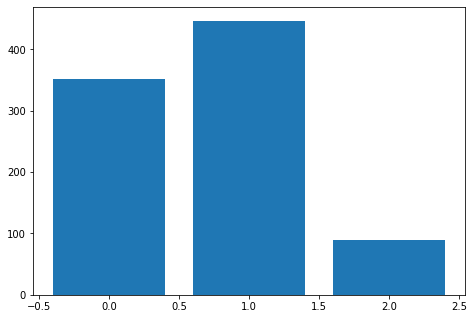

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(3), buckets)
plt.show()

In [ ]:
dcrop = TrainDataset(DATA_FOLDER,dhsgps_file=DHSGPS_FILE)
buckets = torch.zeros(3)
for i in range(889):
    light = dcrop.__getitem__(i)[1]
    buckets[light] += 1

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(3), buckets)
plt.show()